In [1]:
import pyanitools as pyt
import pyaniasetools as aat
import hdnntools as hdt
import numpy as np

from ase_interface import ANIENS
from ase_interface import ensemblemolecule
from ase.atoms import Atoms

import matplotlib.pyplot as plt
import aniensemblestats as ens

/scratch/Anaconda/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


van Der Waals correction will be unavailable. Please install ased3


In [2]:
#h5files = '/home/jujuman/Research/DataReductionMethods/modelCNOSFCl/initial/cv1/testset/testset1.h5'
#h5files = '/home/jujuman/Seagate2TB/Research/ANI-DATASET/h5data/ani_data_c10test.h5'
#h5files = '/home/jujuman/Research/extensibility_test_sets/gdb-10/gdb11_10_test500.h5'
h5files = '/scratch/Research/confs_test/testset0.h5'

#wkdir = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
#wkdir = '/home/jujuman/Research/DataReductionMethods/train_test/ANI-9.0.4_netarch7/'
wkdir = '/scratch/Research/confs_test/arc13/'
#wkdir = '/nh/nest/u/jsmith/scratch/Gits/ANI-Networks/networks/ANI-1x/ANI-9.0.4_netarch8/'
#wkdir = '/home/jujuman/Research/DataReductionMethods/al_working_network/ANI-AL-0707.0000.0401'
#cnstfile = wkdir + '/train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
#saefile  = wkdir + '/train0/sae_wb97x-631gd.dat'

cns = wkdir + '/rHCNO-4.6R_16-3.1A_a4-8.params'
sae  = wkdir + '/sae_linfit.dat'
#cns = wkdir + '/rHCNO-4.6A_16-3.1A_a4-8.params'
#sae  = wkdir + '/sae_6-31gd.dat'
nnf   = wkdir + '/train'
Nn = 5

In [3]:
# Set NC
aens = ensemblemolecule(cns, sae, nnf, Nn, 0)

In [4]:
adl = pyt.anidataloader(h5files)

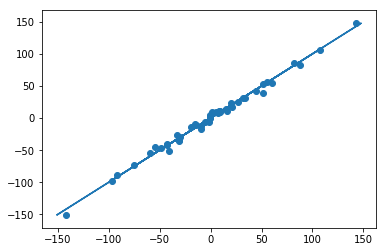

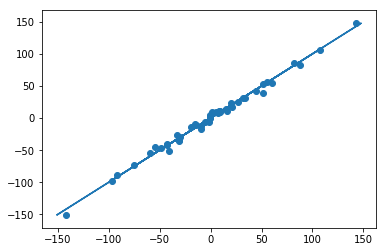

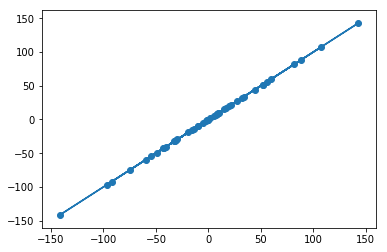

[[-0.00389825 -0.01767386 -0.00345554]
 [-0.0106125   0.00828709  0.00712211]
 [ 0.00933307 -0.01802214  0.00530441]
 [-0.009929    0.00553715 -0.00972992]
 [-0.00151122  0.00827564  0.00582649]
 [ 0.00244337  0.01500489 -0.0183642 ]
 [ 0.00485508  0.02978705  0.010836  ]
 [-0.00667851  0.01362561  0.01380202]
 [ 0.0022975  -0.00555972 -0.00375783]
 [-0.00745296 -0.02607372 -0.00583305]
 [-0.01155137 -0.01904841  0.02173   ]
 [-0.01606833  0.00936807 -0.00665198]
 [ 0.00039343  0.0068957   0.00531966]
 [ 0.00807869  0.00724811 -0.01591651]
 [-0.00684821  0.00395094  0.00896124]
 [ 0.00763432  0.00284528 -0.00267044]] 0.8473968942140209
3.6051912
3.6037815577135266
0.009418136625631743


In [12]:
Eani_t = []
Edft_t = []
for i,data in enumerate(adl):
    if i == 1:
        break
    
    X = data['coordinates']
    S = data['species']
    Edft = hdt.hatokcal*data['energies']
    Fdft = hdt.hatokcal*data['forces']
   
    #Fdft = data['forces']

    #if 'N' in S:
    mol = Atoms(S,X[0])
    mol.set_calculator(ANIENS(aens))
    Fnum = -hdt.evtokcal*mol.calc.calculate_numerical_forces(mol,d=0.004)
    
    aens.set_molecule(X[0],S)
    E, Fani, sig = aens.compute_mean_props()
    Fani = -Fani*hdt.hatokcal
    
    alpha = np.abs(Fani.min()-Fani.max())/np.abs(Fnum.min()-Fnum.max())
    
    plt.plot(Fdft[0].flatten(),Fdft[0].flatten())
    plt.scatter(alpha*Fnum.flatten(),Fdft[0].flatten())
    plt.show()

    plt.plot(Fdft[0].flatten(),Fdft[0].flatten())
    plt.scatter(Fani.flatten(),Fdft[0].flatten())
    plt.show()

    plt.plot(Fani.flatten(),Fani.flatten())
    plt.scatter(alpha*Fnum.flatten(),Fani.flatten())
    plt.show()
    
    print(Fani-alpha*Fnum,alpha)
    
    print(hdt.calculatemeanabserror(Fani.flatten(),Fdft[0].flatten()))
    print(hdt.calculatemeanabserror(alpha*Fnum.flatten(),Fdft[0].flatten()))
    print(hdt.calculatemeanabserror(alpha*Fnum.flatten(),Fani.flatten()))
    #print(hdt.calculatemeanabserror(Fanic.flatten(),Fdft.flatten()))
    
    #print(Fdft)
    #Eani = np.asarray(np.mean(Eani,axis=0))
    #print(Eani,Edft)
    #idx = np.where((Edft - Edft.min() < 300.0))
    #print(np.abs(Edft-Eani), len(S))
    
    #mina = Eani.min()
    #mind = Edft.min()
    
    #Eani_t.append(Eani)
    #Edft_t.append(Edft)
    #print(np.abs(-Fani[0]-hdt.hatokcal*Fdft))

In [ ]:
ens.plot_corr_dist(Eani_t-Eani_t.min(),Edft_t-Edft_t.min())